In [1]:
import sklearn as sk
import numpy as np
import pylab as pl
import pandas as pd
import scipy
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score
from pandas.plotting import bootstrap_plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
%matplotlib inline

In [2]:
mushrooms = pd.read_csv('mushrooms.csv')

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Информация об атрибутах: (классы: съедобные=e, ядовитые=p)

- форма колпачка: колокол=b,конический=c,выпуклый=x,плоский=f, шишковатый=k,затонувший=s

- поверхность колпачка: волокнистая=f,канавки=g,чешуйчатая=y,гладкая=s

- цвет колпачка: коричневый=n,бафф=b,корица=c,серый=g,зеленый=r,розовый=p,фиолетовый=u,красный=e,белый=w,желтый=y

- синяки: синяки=t,нет=f

- запах: миндаль=a,анис=l,креозот=c,рыбный=y,неприятный=f,затхлый=m,нет=n,острый=p,пряный=s

- жаберная насадка: прикрепленная=a,нисходящая=d,свободная=f,зазубренная=n

- расстояние между жабрами: близко=c,тесно=w,далеко=d

- размер жабр: широкий=b,узкий=n

- жабры-цвет: черный=k,коричневый=n,коричневый=b,шоколадный=h,серый=g, зеленый=r,оранжевый=o,розовый=p,фиолетовый=u,красный=e,белый=w,желтый=y

- форма стебля: увеличение=e,сужение=t

- стебель-корень: луковичный=b,клубень=c,чашка=u,равный=e,ризоморфы=z,корни=r,отсутствует=?

- поверхность стебля над кольцом: волокнистая=f,чешуйчатая=y,шелковистая=k,гладкая=s

- стебель-поверхность-под-кольцом: волокнистый=f,чешуйчатый=y,шелковистый=k,гладкий=s

- цвет стебля над кольцом: коричневый=n,буфф=b,корица=c,серый=g,оранжевый=o,розовый=p,красный=e,белый=w,желтый=y

- цвет стебля-ниже кольца: коричневый=n,буфф=b,корица=c,серый=g,оранжевый=o,розовый=p,красный=e,белый=w,желтый=y

- вуаль-тип: частичная=p,универсальная=u

- вуаль-цвет: коричневый=n,оранжевый=o,белый=w,желтый=y

- номер кольца: нет=n,один=o,два=t

- кольцевой тип: паутинный=c,мимолетный=e,вспыхивающий=f,большой=l,нет=n,подвеска=p,оболочка=s,зона=z

- печать спор-цвет: черный=k,коричневый=n,бафф=b,шоколад=h,зеленый=r,оранжевый=o,фиолетовый=u,белый=w,желтый=y

- население: обильное=a,кластеризованное=c,многочисленное=n,рассеянное=s,несколько=v,одиночное=y

- среда обитания: травы=g,листья=l,луга=m,дорожки=p,город=u,отходы=w,леса=d

2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [3]:
print(mushrooms.shape[0])

8124


In [4]:
mushrooms = mushrooms.drop_duplicates()
print(mushrooms.shape[0])

8124


3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

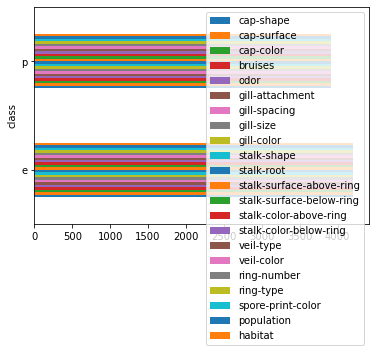

In [5]:
mushrooms.groupby('class').count().plot.barh();

4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

не требуется

5.Выполните замену категориальных признаков; 


In [6]:
le = LabelEncoder()
categorical_columns = mushrooms.columns[mushrooms.dtypes == 'object'].union(['cap-shape'])
for column in categorical_columns:
    mushrooms[column] = le.fit_transform(mushrooms[column])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

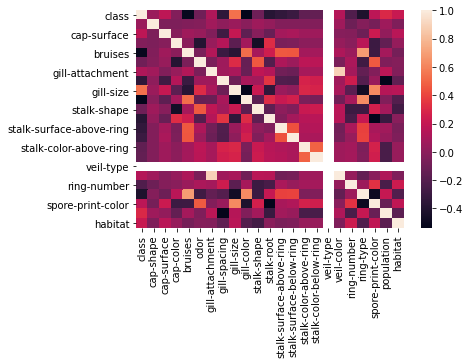

In [7]:
sns.heatmap(mushrooms[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].corr())

7.Заполните пропущенные значения в данных;


In [8]:
mushrooms[column] = mushrooms.groupby("class").transform(lambda x:x.fillna(x.mean()))

8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [37]:
knn = RadiusNeighborsClassifier()
paramsearch.estimator.get_params().keys()


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'outlier_label', 'p', 'radius', 'weights'])

In [65]:

X = mushrooms.iloc[:, 2:23].values
Y = mushrooms.iloc[:, :1].values
Y =Y.astype('int')
X =X.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33,random_state=42)

knn = RadiusNeighborsClassifier(radius=3.0)

knn.fit(X_train, np.ravel(y_train,order='C'))

pred = knn.predict(X_test)
print(sk.metrics.accuracy_score(y_test, pred))
# print(y_test)
# print(pred)

0.9955240581872435


<Figure size 720x576 with 0 Axes>

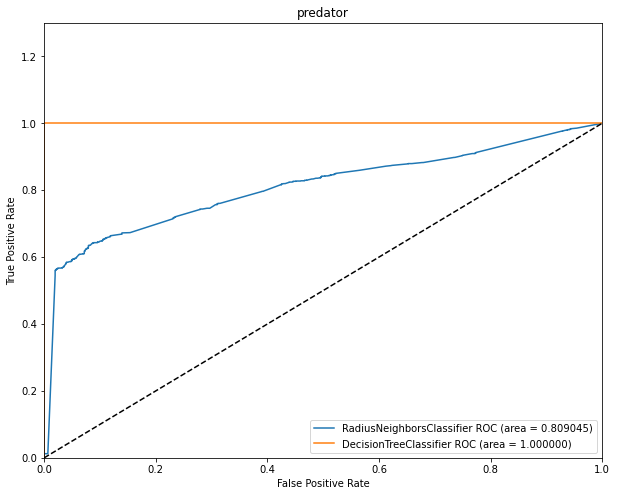

In [69]:
plt.figure(figsize=(10,8))
clf_isotonic = CalibratedClassifierCV(slf, cv=10, method='isotonic')
clf_isotonic.fit(X_train,  np.ravel(y_train,order='C'))
probas_slf0 = clf_isotonic.predict_proba(X_test)
clf_isotonic.fit(X_train,  np.ravel(y_train,order='C'))
probas_slf1 = clf_isotonic.predict_proba(X_test)

plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, probas_slf1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc))   

dtc = DecisionTreeClassifier()
probas_dtc1 = dtc.fit(X_train,  np.ravel(y_train,order='C')).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.3])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('predator')
plt.show()

2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [60]:
X = mushrooms.iloc[:, 2:23].values
Y = mushrooms.iloc[:, :1].values
Y =Y.astype('int')
X =X.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33,random_state=42)

knn = tree.DecisionTreeClassifier()

knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(sk.metrics.accuracy_score(y_test, pred))
# print(y_test)
# print(pred)

1.0


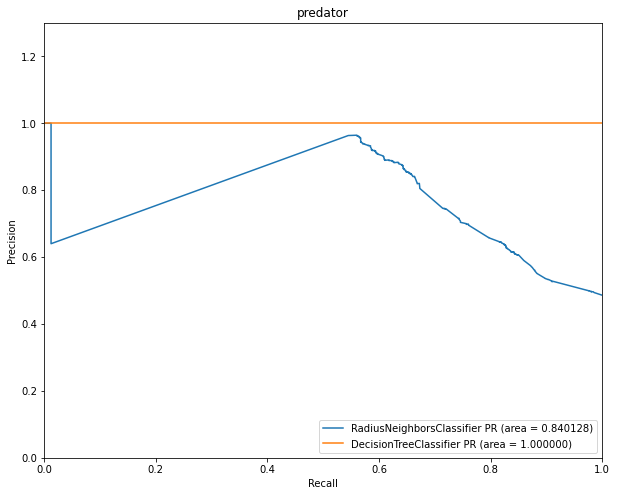

In [71]:
plt.figure(figsize=(10,8))
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf1[:,1])
aps_slf1 = average_precision_score(y_test,probas_slf1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier',  aps_slf1)) 
precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.3])
plt.legend(loc=4, fontsize='medium')
plt.title('predator')
plt.show()